<div style="
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 40px 30px 40px 0px;
    border-radius: 15px;
    color: white;
    margin-bottom: 30px;
    box-shadow: 0 10px 30px rgba(0,0,0,0.2);
">

<div style="
    display: grid;
    grid-template-columns: 1fr 3fr 1fr;
    align-items: center;
    max-width: 1000px;
    margin: 0 auto;
">

<!-- Course Info (Left) -->
<div style="text-align: left;">
    <div style="
        background: rgba(255,255,255,0.2);
        padding: 8px 15px;
        border-radius: 20px;
        display: inline-block;
        font-weight: bold;
        margin-bottom: 5px;
    ">IM5022</div>
    <div style="font-size: 0.9em; opacity: 0.9;">Machine Learning</div>
</div>

<!-- Main Title (Center) -->
<div style="text-align: center;">
    <h1 style="
        font-size: 2.2em;
        margin: 0 0 15px 0;
        font-weight: bold;
        text-shadow: 2px 2px 4px rgba(0,0,0,0.3);
    ">Predicting Credit Card Default Using Machine Learning</h1>
    <h2 style="
        font-size: 1.3em;
        margin: 0;
        font-weight: normal;
        font-style: italic;
        opacity: 0.9;
    ">A Comparative Study of Classification Algorithms</h2>
</div>

<!-- Student Info (Right) -->
<div style="text-align: right;">
    <div style="
        background: rgba(255,255,255,0.2);
        padding: 8px 15px;
        border-radius: 20px;
        display: inline-block;
        margin-bottom: 8px;
        font-size: 0.9em;
    ">Student ID: MS25947816</div>
    <br>
    <div style="
        background: rgba(255,255,255,0.2);
        padding: 8px 15px;
        border-radius: 20px;
        display: inline-block;
        font-size: 0.9em;
    ">Student ID: MS25942002</div>
</div>

</div>
</div>

---

## **1 Introduction**



This project specifically focuses on predicting whether a credit card holder will default on their payment in the next month. By analyzing payment history, demographic information, credit utilization patterns, and recent financial behavior, we aim to identify customers at risk of missing their upcoming payment deadline.

Predicting next month defaults is particularly valuable because it provides actionable insights with immediate business impact. Banks can use these predictions to:

  - Send targeted payment reminders
  - Offer payment assistance programs
  - Adjust credit limits proactively
  - Implement early intervention strategies

This notebook demonstrates a comprehensive approach to building, evaluating, and interpreting machine learning models for next month credit card default prediction

In [34]:
# Load necessary libraries
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pathlib


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [85]:
# SETTINGS

# Set display options for pandas
pd.options.display.max_columns = 50

import warnings
warnings.filterwarnings('ignore')

## **2 Data Collection & Getting to Know Our Data**
> Here, we are about to check data quality, completeness, and distribution & through EDA we are going to uncover hidden patterns, relationships, and insights that will guide our modeling approach

### **2.0 Dataset**

#### **Dataset Information: Default of Credit Card Clients**

**Overview**
This dataset contains information about credit card clients' default payments in Taiwan. 

**Source:** UCI Machine Learning Repository  
**Dataset ID:** 350  

#### Target Variable - `Y (Default Payment):` Binary variable (1 = Yes, 0 = No)

#### Feature Description

#### Demographics
- `LIMIT_BAL:` Amount of given credit (NT dollar) - includes individual consumer credit and family supplementary credit
- `SEX:` Gender (1 = male, 2 = female)
- `EDUCATION:` Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others)
- `MARRIAGE:` Marital status (1 = married, 2 = single, 3 = others)
- `AGE:` Age in years

#### Payment History (PAY_0-PAY_6)
Past monthly payment records from April to September 2005:
- **PAY_0:** Repayment status in September 2005
- **PAY_2:** Repayment status in August 2005
- **PAY_3:** Repayment status in July 2005
- **PAY_4:** Repayment status in June 2005
- **PAY_5:** Repayment status in May 2005
- **PAY_6:** Repayment status in April 2005

**Payment Status Scale:**
- -1 = Pay duly
- 1 = Payment delay for one month
- 2 = Payment delay for two months
- ...
- 8 = Payment delay for eight months
- 9 = Payment delay for nine months and above

#### Bill Statements (BILL_AMT1-BILL_AMT2)
Amount of bill statement (NT dollar) from April to September 2005:
- **BILL_AMT1:** Bill statement amount in September 2005
- **BILL_AMT2:** Bill statement amount in August 2005
- **BILL_AMT3:** Bill statement amount in July 2005
- **BILL_AMT4:** Bill statement amount in June 2005
- **BILL_AMT5:** Bill statement amount in May 2005
- **BILL_AMT6:** Bill statement amount in April 2005

#### Previous Payments (PAY_AMT1-PAY_AMT6)
Amount of previous payment (NT dollar) from April to September 2005:
- **PAY_AMT1:** Amount paid in September 2005
- **PAY_AMT2:** Amount paid in August 2005
- **PAY_AMT3:** Amount paid in July 2005
- **PAY_AMT4:** Amount paid in June 2005
- **PAY_AMT5:** Amount paid in May 2005
- **PAY_AMT6:** Amount paid in April 2005

### **2.1 Data Loading and Rudimentary Data Cleansing** 

In [3]:

filename = pathlib.Path(os.path.dirname(os.getcwd())) / pathlib.Path('data/raw/UCI_Credit_Card.csv')
print(f"Current working directory: {os.path.relpath(os.getcwd())}")
print(f"File name: {os.path.relpath(filename)}")

Current working directory: .
File name: ..\data\raw\UCI_Credit_Card.csv


In [4]:
pathlib.Path(filename).exists()

True

**Windows Filepath Settings**

In [5]:
# Define the relative path to the dataset
# No need to change this path if the dataset is in the same directory structure
# rel_path = r'data\raw\UCI_Credit_Card.csv'
# base_dir = os.path.dirname(os.getcwd())
# filename = os.path.join(base_dir, rel_path) # Construct the full path to the dataset

In [6]:
# Load the dataset
df = pd.read_csv(filename)
# print(f"Dataset loaded from: {filename}")
print(f"Dataset shape: {df.shape}")
# Display the first few rows of the dataframe
df.head()

Dataset shape: (30000, 25)


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [7]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
# Display summary statistics of the dataframe
df.describe(include='all')

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

In [9]:
# Check for missing values in the dataframe
missing_columns = [col for col in df.columns if df[col].isnull().any()]
missing_columns # no missing values found

[]

In [10]:
# Check for duplicate rows in the dataframe
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [11]:
# Display the distribution of the target variable
target_var = 'default.payment.next.month'
print(f"Distribution of target variable '{target_var}':")
print(df[target_var].value_counts(normalize=True))

Distribution of target variable 'default.payment.next.month':
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [12]:
# Rename columns for clarity
df = df.rename(columns={'PAY_0':'PAY_1', 'default.payment.next.month':'DEFAULT'})
# Drop the ID column as it is not useful for analysis
df = df.drop(columns=['ID'])

In [13]:
# Check the unique values in PAY_1 to PAY_6 columns
for i in range(6):
    print('PAY_' + str(i+1), df['PAY_' + str(i+1)].unique())

PAY_1 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5]


In [14]:
# fill -2, -1, 0 with 0 for PAY_1, PAY_2, ..., PAY_6
# since -2, -1, 0 means pay duly
for i in range(6):
    col = 'PAY_' + str(i+1)
    filter_ = (df[col] == 0) | (df[col] == -1) | (df[col] == -2)
    df.loc[filter_, col] = 0

In [15]:
# Recheck the unique values in PAY_1 to PAY_6 columns
for i in range(6):
    print('PAY_' + str(i+1), df['PAY_' + str(i+1)].unique())

PAY_1 [2 0 1 3 4 8 7 5 6]
PAY_2 [2 0 3 5 7 4 1 6 8]
PAY_3 [0 2 3 4 6 7 1 5 8]
PAY_4 [0 2 3 4 5 7 6 1 8]
PAY_5 [0 2 3 5 4 7 8 6]
PAY_6 [0 2 3 6 4 7 8 5]


In [16]:
# lets label 0 as Others because 0 is not a valid value for MARRIAGE as per the data description
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})
df['MARRIAGE'].value_counts()  # Check the unique values in MARRIAGE column

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [17]:
# Map numerical values to categorical labels for better interpretability
df['MARRIAGE'] = df['MARRIAGE'].replace({1: 'Married', 2: 'Single', 3: 'Others'})

In [18]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# lets label 0, 5, 6 as Others because 0, 5, 6 are not valid values for EDUCATION
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
df['EDUCATION'].value_counts()  # Check the unique values in EDUCATION column       

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [19]:
# Map numerical values to categorical labels for better interpretability
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'})
df['SEX'] = df['SEX'].replace({1: 'Male', 2:'Female'})

In [20]:
# Define age groups and create a new column 'age_group', new column names will be denoted snake case
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

In [21]:
# DEFINE SOME COMMON VARIABLES

repayment_status_cols = [f'PAY_{i+1}' for i in range(6)]
bill_amount_cols = [f'BILL_AMT{i+1}' for i in range(6)]
payment_amount_cols = [f'PAY_AMT{i+1}' for i in range(6)]


# Set target variable

target = 'DEFAULT'

# Define categorical and numeric columns for further analysis
category_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GROUP']
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in category_cols + ['DEFAULT', 'AGE']]

print("Categorical columns:", category_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GROUP']
Numeric columns: ['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


### **2.2 Exploratory Data Analysis (EDA)**

#### Univariate Analysis

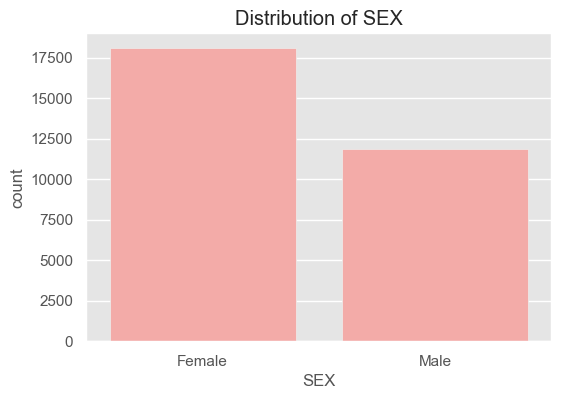

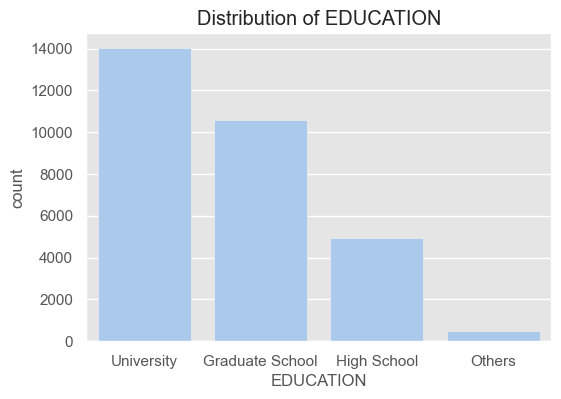

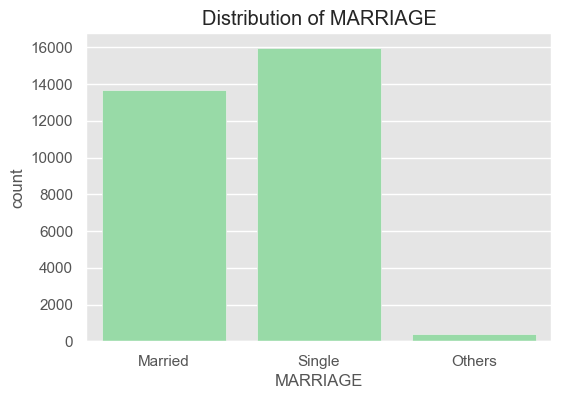

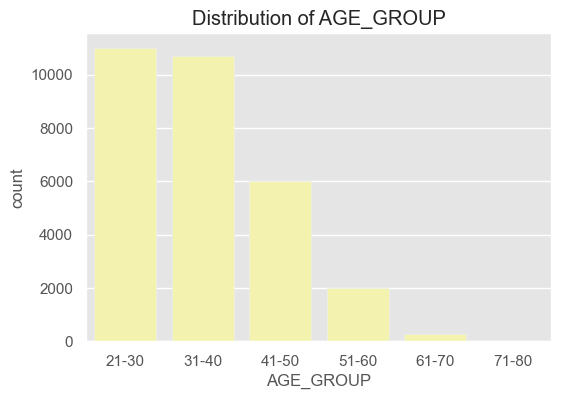

In [169]:
# check sparsity in categorical columns
colors = ['r', 'b', 'g', 'y', 'm', 'c']
for col, c in zip(category_cols, colors):
    plt.style.use('ggplot')
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, color=c)
    plt.title(f'Distribution of {col}')
    plt.show()

In [170]:
# checking about sparse values in numeric columns, checking percentage of zeros
sparse_info = {}    
for col in numeric_cols:
    sparse_info[col] = (df[col] == 0).sum() / df.shape[0] * 100  # percentage of zeros   
sparse_info = dict(sorted(sparse_info.items(), key=lambda item: item[1], reverse=True))
sparse_info 
pd.DataFrame(sparse_info, index=['sparsity %']).T   

sparsity %
PAY_5       90.106667
PAY_6       89.736667
PAY_4       88.300000
PAY_3       85.956667
PAY_2       85.206667
PAY_1       77.273333
PAY_AMT6    23.910000
PAY_AMT5    22.343333
PAY_AMT4    21.360000
PAY_AMT3    19.893333
PAY_AMT2    17.986667
PAY_AMT1    17.496667
BILL_AMT6   13.400000
BILL_AMT5   11.686667
BILL_AMT4   10.650000
BILL_AMT3    9.566667
BILL_AMT2    8.353333
BILL_AMT1    6.693333
LIMIT_BAL    0.000000

In [171]:
df['SEX'].value_counts()

SEX
Female    18112
Male      11888
Name: count, dtype: int64

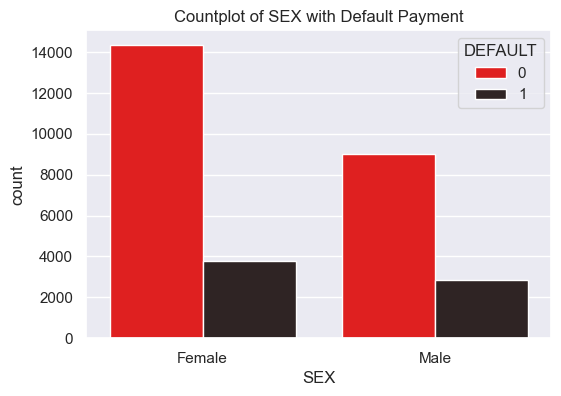

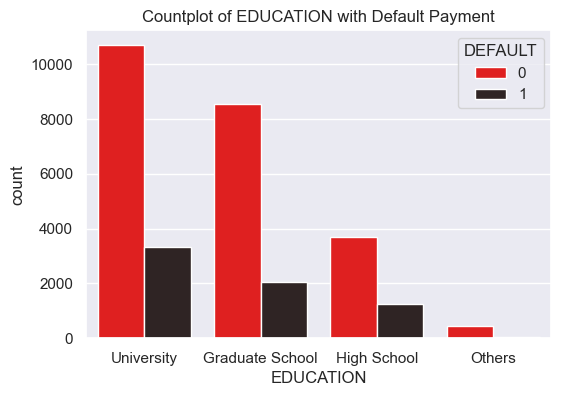

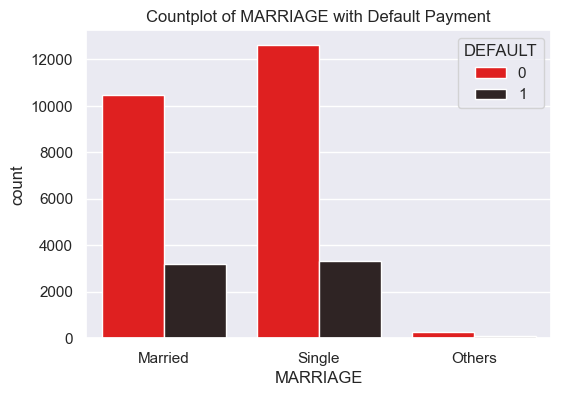

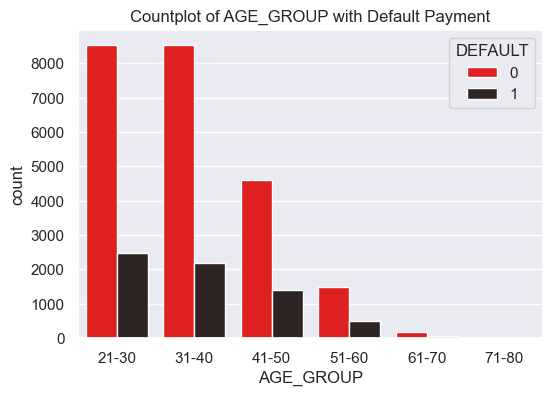

In [172]:
# check relationship between categorical columns and target variable
for col, c in zip(category_cols, colors):
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue=target,  palette='dark:red_r')
    plt.title(f'Countplot of {col} with Default Payment')
    plt.show()

In [173]:
# function to draw histograms for numeric columns
def draw_histograms(dataframe, cols, n_rows, n_cols, figsize=(15, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        if i < len(axes):
            sns.histplot(data=dataframe, x=col, kde=True, ax=axes[i], color=random.choice(colors))
            axes[i].set_title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()

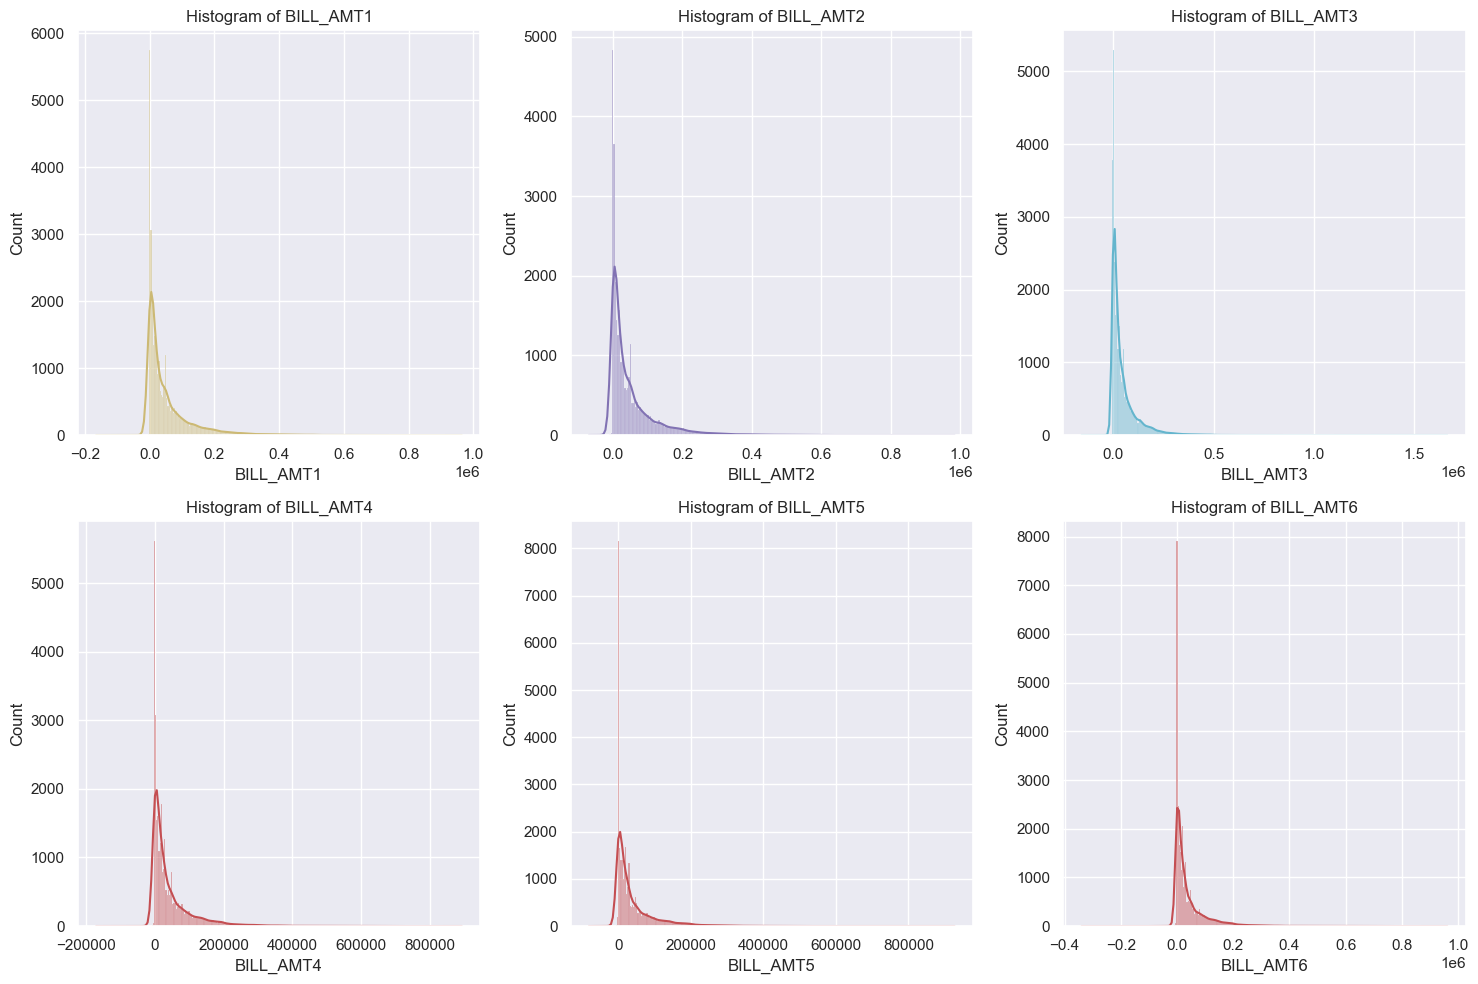

In [174]:
bills = [col for col in numeric_cols if 'BILL_AMT' in col]
draw_histograms(df, bills, 2, 3, figsize=(15, 10))

In [175]:
df[bills].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
90%    142133.700000  136905.500000  1.320513e+05  122418.700000   
95%    201203.050000  194792.200000  1.878210e+05  174333.350000   
99%    350110.680000  337495.280000  3.250304e+05  304997.270000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   30000.000000   30000.000000  
mean    40311.400967   38871.760400  
std     60797.155770   59554.107537  
min    -81334.000000 -339603.000000  
25%      1763.000000    1256.000000  
50%     18104.500000   17071.000000  
75%     50190.500000   49198.250000  
90%    115883.000000  112110.400000  
95%    165794.300000  161912.000000  
99%    285868.330000  279505.060000  
max    927171.000000  961664.000000

In [176]:
# Filter rows where all 'bills' columns are less than their respective 99th percentile
bills_99 = {col: df[col].quantile(0.99) for col in bills}
rows_under_99 = df[(df[bills] < pd.Series(bills_99)).all(axis=1)]
rows_under_99.shape

(29468, 25)

**What bill amount says and What we can do with this**

from above histogram, we can clearly see it is `right-skewed distribution`, most customers (~ 75%) have relatively low bill amounts (<65000), few customers have very high bills. and also high bills mean potentially higher risk. further, high bills are indication of emergency spending or potential fraud. Since we can see spending range, we can group customers, and also we can calculate their spending strength as per credit limit. (`Bill to Credit Limit Ratio`)

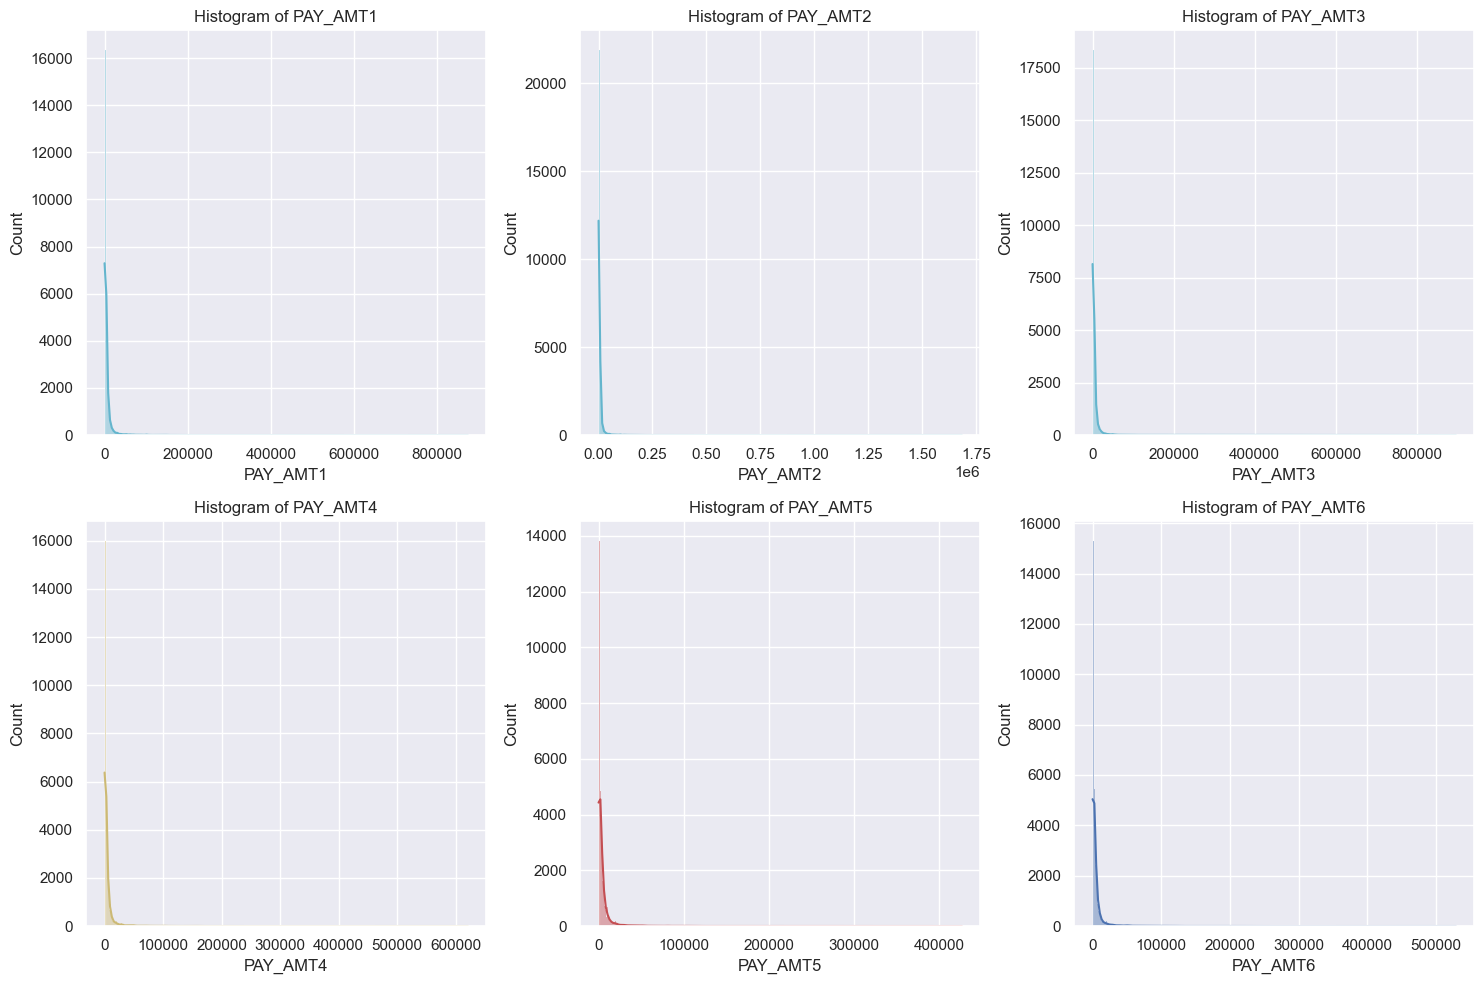

In [177]:
paid_amounts_cols = [col for col in numeric_cols if 'PAY_AMT' in col]
draw_histograms(df, paid_amounts_cols, 2, 3, figsize=(15, 10))

In [178]:
df[paid_amounts_cols].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
90%     10300.000000  1.040110e+04   10000.00000    9570.600000   
95%     18428.200000  1.900435e+04   17589.40000   16014.950000   
99%     66522.180000  7.665102e+04   70000.00000   67054.440000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
90%      9500.000000    9600.000000  
95%     16000.000000   17343.800000  
99%     65607.560000   82619.050000  
max    426529.000000  528666.000000

In [179]:
# function to draw boxplots for numeric columns
def draw_boxplots(dataframe, cols, n_rows, n_cols, figsize=(15, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        if i < len(axes):
            sns.boxplot(data=dataframe, x=col, ax=axes[i], color=random.choice(colors))
            axes[i].set_title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


**Removing rows which is more than percentile 95 to see better payment range in plots**

In [180]:
# Filter rows where all 'previous' columns are less than their respective 95th percentile
paid_amounts_95 = {col: df[col].quantile(0.95) for col in paid_amounts_cols}
paid_amounts_95 = df[(df[paid_amounts_cols] < pd.Series(paid_amounts_95)).all(axis=1)]
paid_amounts_95.shape


(24271, 25)

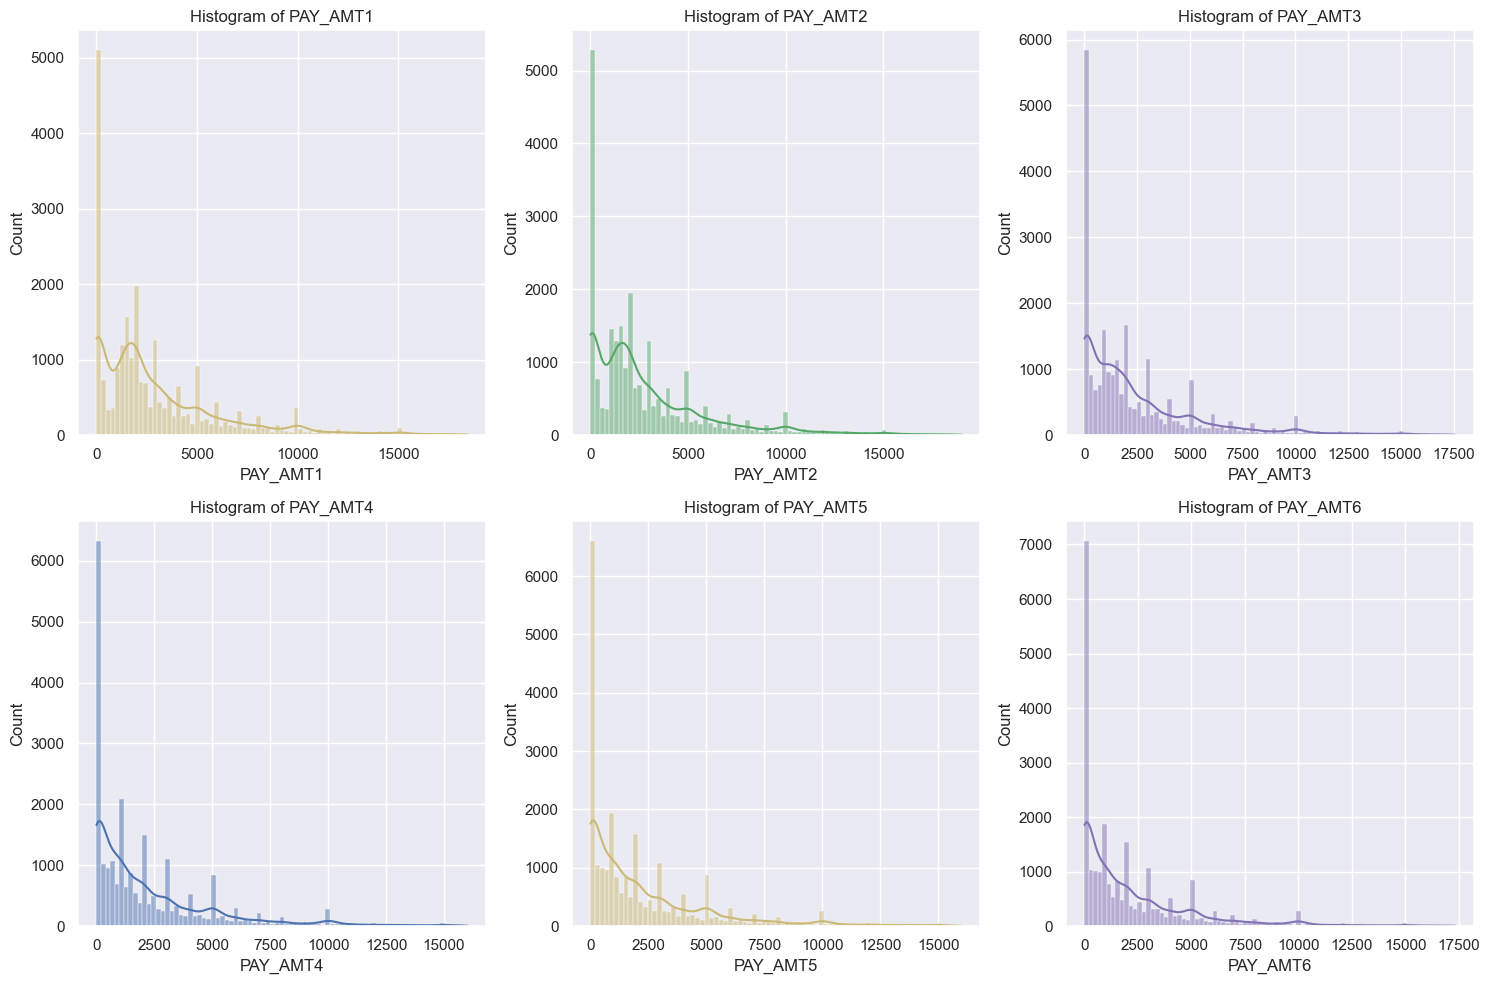

In [181]:
 
draw_histograms(paid_amounts_95, paid_amounts_cols, 2, 3, figsize=(15,10))

From above histograms, highly skewed distribution is observed in all the previous payment amount columns after even removing the extreme outliers.

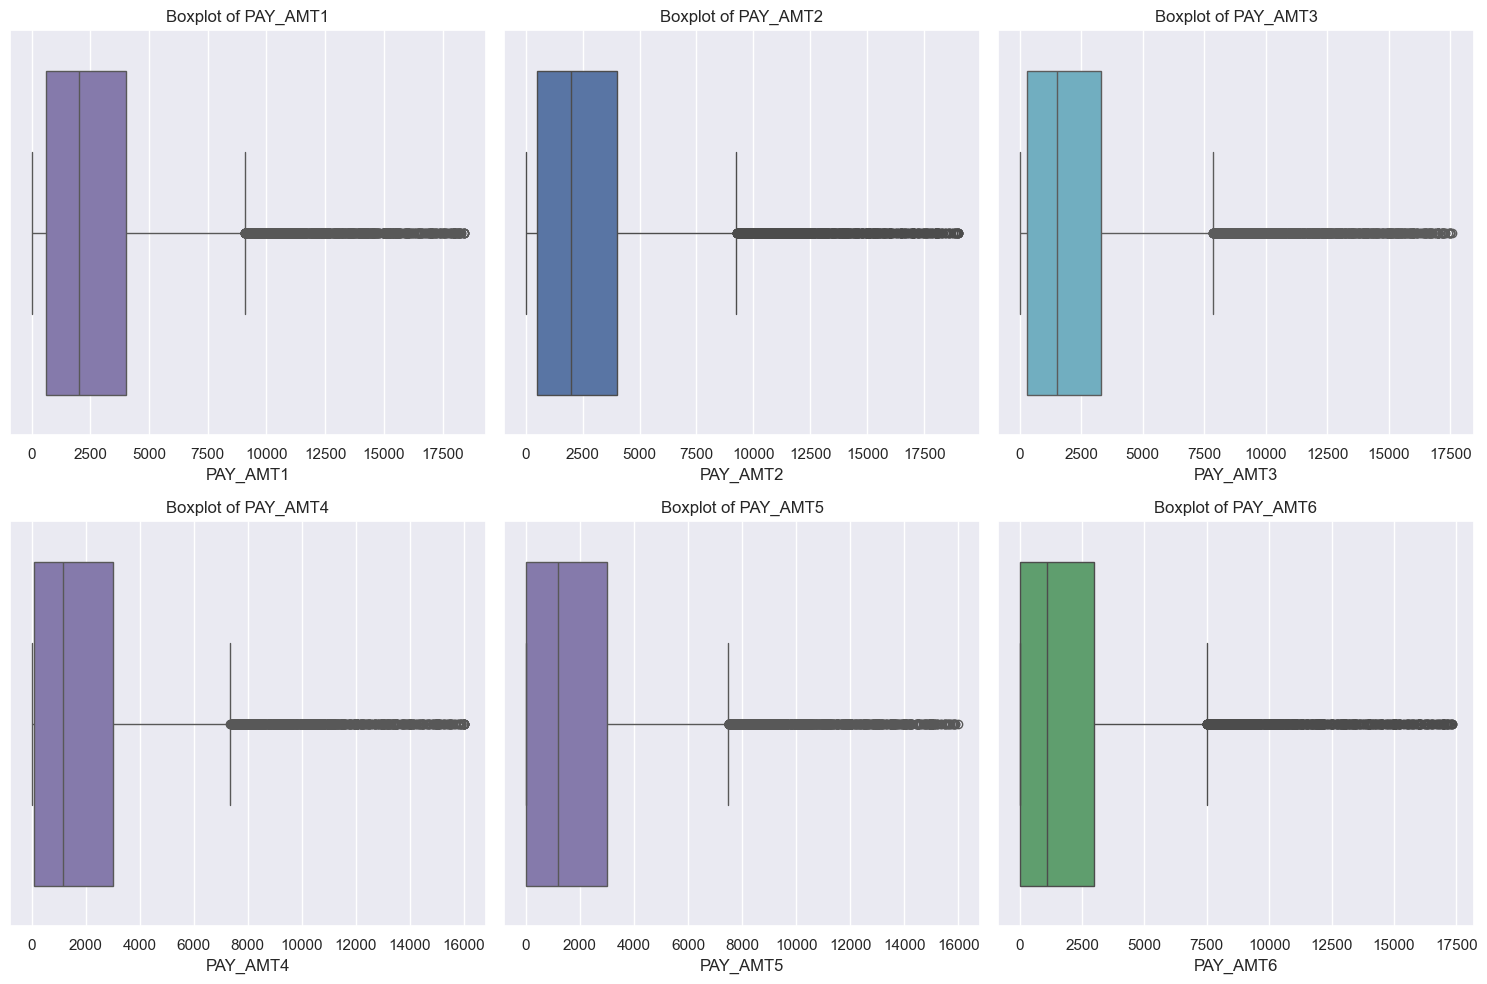

In [182]:
draw_boxplots(paid_amounts_95, paid_amounts_cols, 2, 3, figsize=(15, 10))

In [183]:
# from above boxplots we can see that there are still some outliers in the data but they are not that significant. So we can keep them as it is.    

**What paid amount says and What we can do with this**

Most customers make relatively small payments, paying only a small fraction of their bills. We need to see payment to bill ratio as well

In [184]:
df[df[paid_amounts_cols].sum(axis=1) == 0].head()  # customers who never paid anything in last 6 months

LIMIT_BAL     SEX        EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
18    360000.0  Female  Graduate School  Married   49      1      0      0   
19    180000.0  Female  Graduate School   Single   29      1      0      0   
45    210000.0    Male  Graduate School   Single   29      0      0      0   
79    240000.0  Female       University   Single   44      1      0      0   
109   360000.0    Male       University  Married   35      1      0      0   

     PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
18       0      0      0        0.0        0.0        0.0        0.0   
19       0      0      0        0.0        0.0        0.0        0.0   
45       0      0      0        0.0        0.0        0.0        0.0   
79       0      0      0        0.0        0.0        0.0        0.0   
109      0      0      0     -103.0     -103.0     -103.0     -103.0   

     BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
18         0.0        0.0       0.0       0.0       0.0       0.0       0.0   
19         0.0        0.0       0.0       0.0       0.0       0.0       0.0   
45         0.0        0.0       0.0       0.0       0.0       0.0       0.0   
79         0.0        0.0       0.0       0.0       0.0       0.0       0.0   
109     -103.0     -103.0       0.0       0.0       0.0       0.0       0.0   

     PAY_AMT6  DEFAULT AGE_GROUP  
18        0.0        0     41-50  
19        0.0        0     21-30  
45        0.0        1     21-30  
79        0.0        1     41-50  
109       0.0        0     31-40

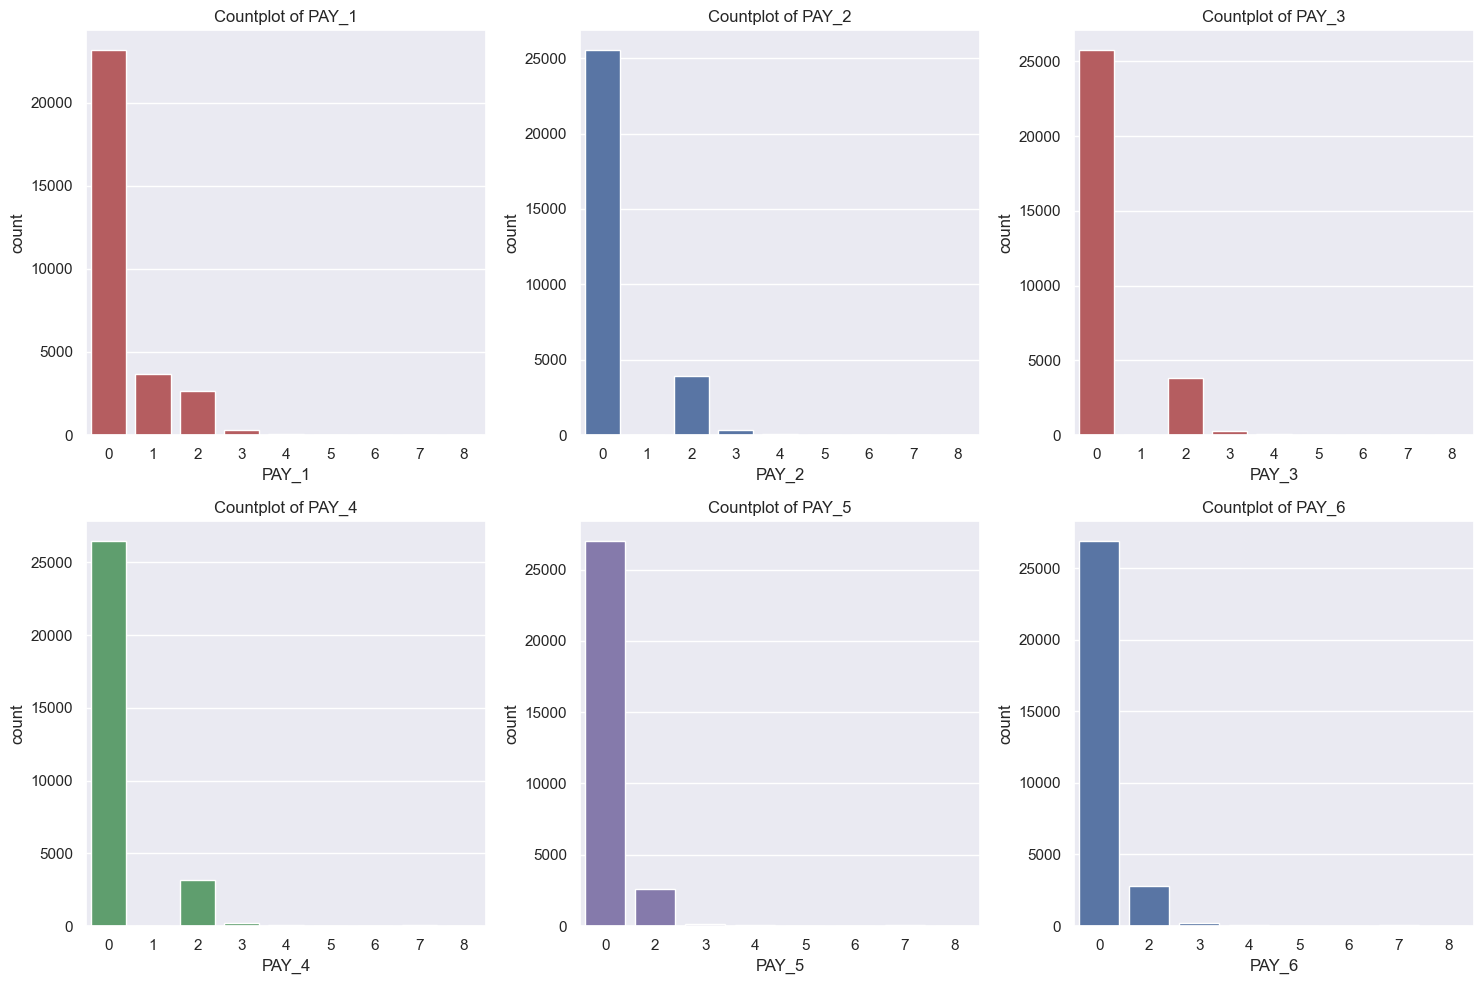

In [185]:
# Fnction to draw barplots for categorical columns
def draw_barplots(dataframe, cols, n_rows, n_cols, figsize=(15, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        if i < len(axes):
            sns.countplot(data=dataframe, x=col, ax=axes[i], color=random.choice(colors))
            axes[i].set_title(f'Countplot of {col}')
    
    plt.tight_layout()
    plt.show()

draw_barplots(df, [f'PAY_{i+1}' for i in range(6)], 2, 3, figsize=(15, 10))

In [186]:
# it is observed that majority of the customers have paid duly in last 6 months. Very few customers have delayed payments and 
# it is also with delay of 2 or 3 months.


In [187]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [188]:
mode_of_credit_limit = df['LIMIT_BAL'].mode()
print(f"Mode of CREDIT LIMIT: {mode_of_credit_limit[0]}")

Mode of CREDIT LIMIT: 50000.0


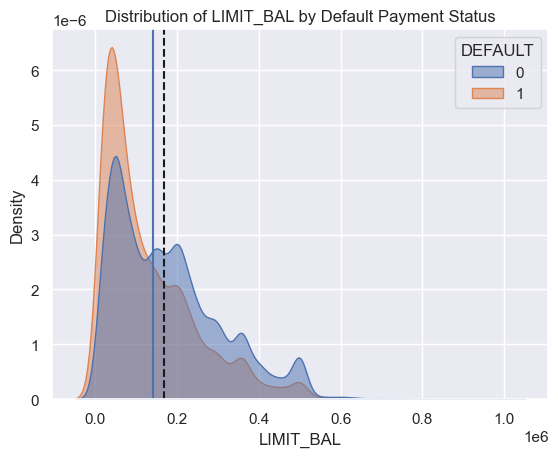

In [189]:
sns.kdeplot(data=df, x='LIMIT_BAL', hue=target, fill=True, common_norm=False, alpha=0.5)
plt.axvline(x=df['LIMIT_BAL'].mean(), color='k', linestyle='--', label='Mean LIMIT_BAL')
plt.axvline(x=df['LIMIT_BAL'].median(), color='b', linestyle='-', label='Median LIMIT_BAL')
plt.title('Distribution of LIMIT_BAL by Default Payment Status')
plt.show()


In [190]:
# As per above distribution, we can see that most customers have a credit limit of less than 100,000. 
# The mean credit limit is around 167,484, which is higher than the median of 140,000, 
# indicating a right-skewed distribution. This suggests that while most customers have lower credit limits, 
# there are some with significantly higher limits that raise the average. but here one notably, 
# most defaulted customers are having a credit limit less than or equal to 140000.

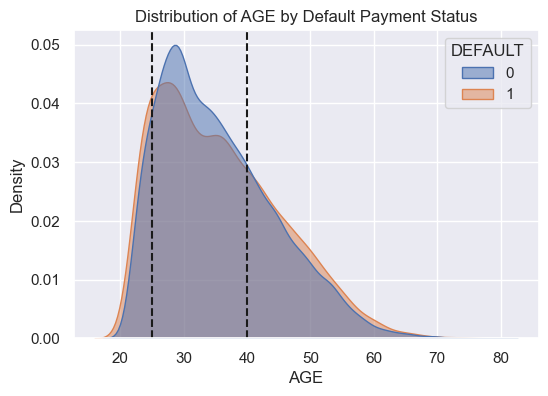

In [191]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,4))   
sns.kdeplot(data=df, x='AGE', hue=target, fill=True, common_norm=False, alpha=0.5)
plt.axvline(x=25, color='k', linestyle='--', label='Mean AGE')
plt.axvline(x=40, color='k', linestyle='--', label='Median AGE')
plt.title('Distribution of AGE by Default Payment Status')
plt.show()

In [192]:
# as per above age distribution, most customers are between 20-50 years old. 
# and defaulted customers are mostly less than 25 or more than 40 years old.
# so age is not a significant factor for default payment prediction

In [194]:
# Check if there are subtle differences
default_rates_by_age = df.groupby('AGE_GROUP', observed=False)[target].mean()
print(default_rates_by_age)

AGE_GROUP
21-30    0.224371
31-40    0.204331
41-50    0.232973
51-60    0.252379
61-70    0.264591
71-80    0.333333
Name: DEFAULT, dtype: float64


In [ ]:
# above output shows that default rates are relatively consistent across different age groups

In [195]:
df_cross_tab = pd.crosstab(df['EDUCATION'], df[target], rownames=['EDUCATION'], colnames=['Defaulted'])
df_cross_tab["default_rate (%)"] = (df_cross_tab[1] / (df_cross_tab[0] + df_cross_tab[1]) * 100).round(2)
df_cross_tab

Defaulted            0     1  default_rate (%)
EDUCATION                                     
Graduate School   8549  2036             19.23
High School       3680  1237             25.16
Others             435    33              7.05
University       10700  3330             23.73

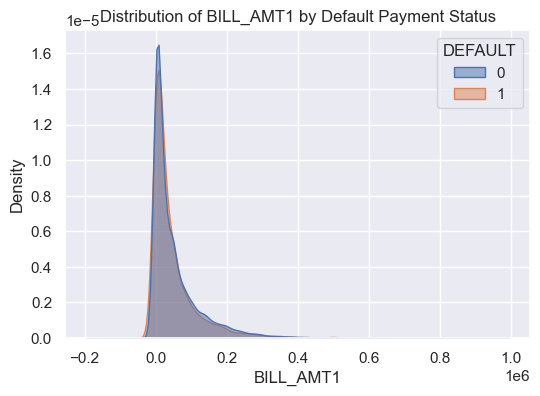

In [196]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,4))   
sns.kdeplot(data=df, x='BILL_AMT1', hue=target, fill=True, common_norm=False, alpha=0.5)
plt.title('Distribution of BILL_AMT1 by Default Payment Status')
plt.show()

In [197]:
pd.set_option('future.no_silent_downcasting', True)

**Key Observation Alert**

In [198]:
df_september = df[['BILL_AMT1', 'PAY_AMT1', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4',  target]]
df_september['paid_enough_september'] = df_september['PAY_AMT1'] >= df_september['BILL_AMT1']
df_september[['paid_enough_september', 'PAY_AMT1', 'BILL_AMT1', 'PAY_1']].tail()
df_september['paid_enough_september'].value_counts()

C:\Users\SathkunarajahM\AppData\Local\Temp\ipykernel_15908\223111499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_september['paid_enough_september'] = df_september['PAY_AMT1'] >= df_september['BILL_AMT1']


paid_enough_september
False    23531
True      6469
Name: count, dtype: int64

In [199]:
df_september[(df_september['paid_enough_september'] == True) & (df_september[target] == 1) ]

BILL_AMT1  PAY_AMT1  PAY_1  PAY_2  PAY_3  PAY_4  DEFAULT  \
21         316.0     316.0      0      0      0      0        1   
23        5512.0   19428.0      0      0      0      0        1   
26        -109.0       0.0      1      0      0      0        1   
38           0.0     780.0      1      0      0      0        1   
45           0.0       0.0      0      0      0      0        1   
...          ...       ...    ...    ...    ...    ...      ...   
29911      326.0     326.0      0      0      0      0        1   
29929     1804.0    1804.0      0      0      0      0        1   
29942     1475.0    1826.0      0      0      0      0        1   
29973        0.0       0.0      1      0      0      0        1   
29998    -1645.0   85900.0      1      0      0      0        1   

       paid_enough_september  
21                      True  
23                      True  
26                      True  
38                      True  
45                      True  
...                      ...  
29911                   True  
29929                   True  
29942                   True  
29973                   True  
29998                   True  

[1243 rows x 8 columns]

In [200]:
# it is noteworthy that a significant number of customers who paid their September bill in full still defaulted on their next payment.
# not only that, their last payment status for last four months was also 0, indicating that they had paid duly in those months as well.
# it suggests that factors other than just the most recent payment behavior are influencing default risk.
# it could be related to their overall financial situation, credit history, or other external factors not captured in this dataset.

#### Bivariate Analysis

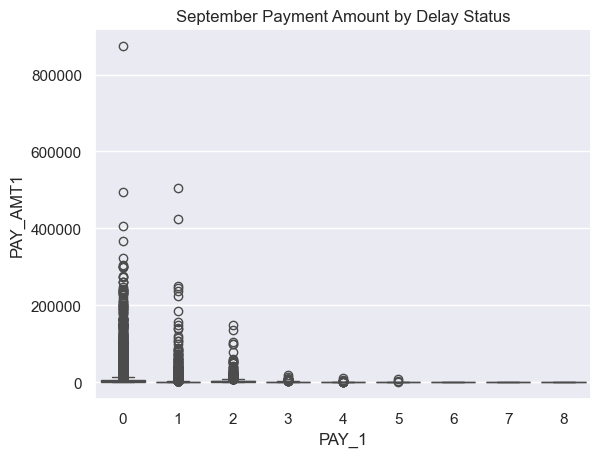

In [201]:
sns.boxplot(x='PAY_1', y='PAY_AMT1', data=df)
plt.title('September Payment Amount by Delay Status')
plt.show()

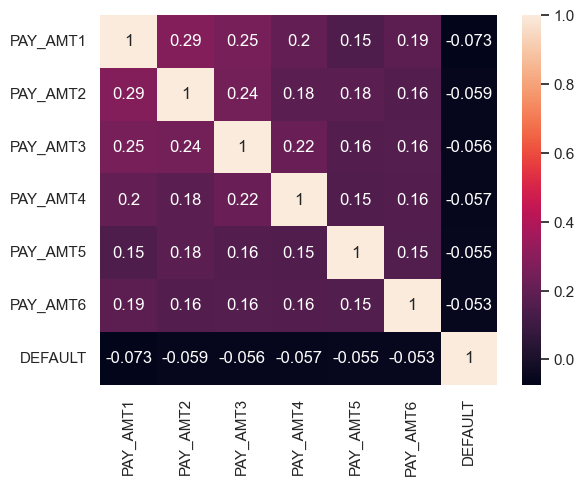

In [202]:
sns.heatmap(df[payment_amount_cols + [target]].corr(), annot=True) # check correlation between payment amount columns and target variable
plt.show()

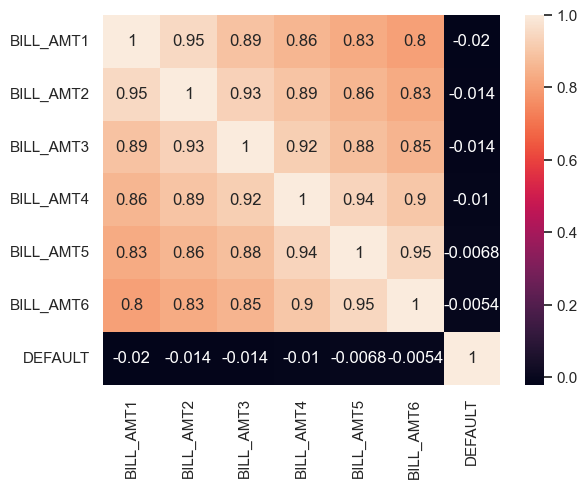

In [203]:
sns.heatmap(df[bill_amount_cols + [target]].corr(), annot=True) # check correlation between bill amount columns and target variable
plt.show()

In [204]:
# obeservation: bill amounts are more correlated with other bill amounts. so here multicollinearity might be an issue.
#  so we may drop some bill month columns. 

In [205]:
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
plt.figure(figsize=(16, 10), dpi=1200)
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,
    square=True,
    linewidths=0.5,
    cmap="Blues",
    fmt=".2f",
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 8},
) # check correlation between all numeric columns
plt.show()

In [206]:
# -- key findings from heatmap:--
# here, what we can observe is that bill amount columns are highly correlated with each other.
#  and payment amount columns are also correlated with each other.
# so we need to drop some of these columns to avoid multicollinearity issue.
# why because some algorithms like logistic regression are sensitive to multicollinearity? 
# because they assume that the features are independent of each other.
# Since it is a classification problem, feature to feature correlation should be considered.
# and only payment status columns are correlated with the target variable.

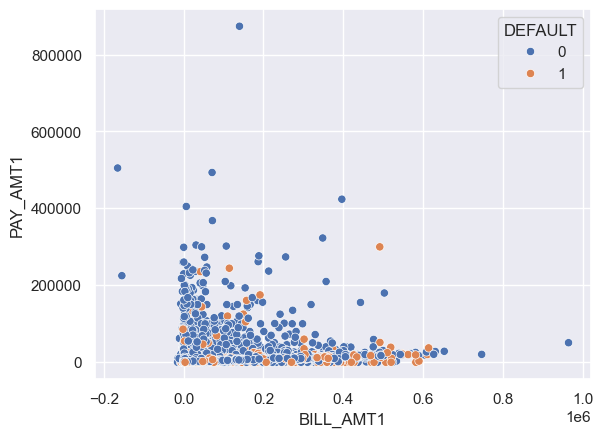

In [207]:
sns.scatterplot(x='BILL_AMT1', y='PAY_AMT1', hue=target, data=df)
plt.show()

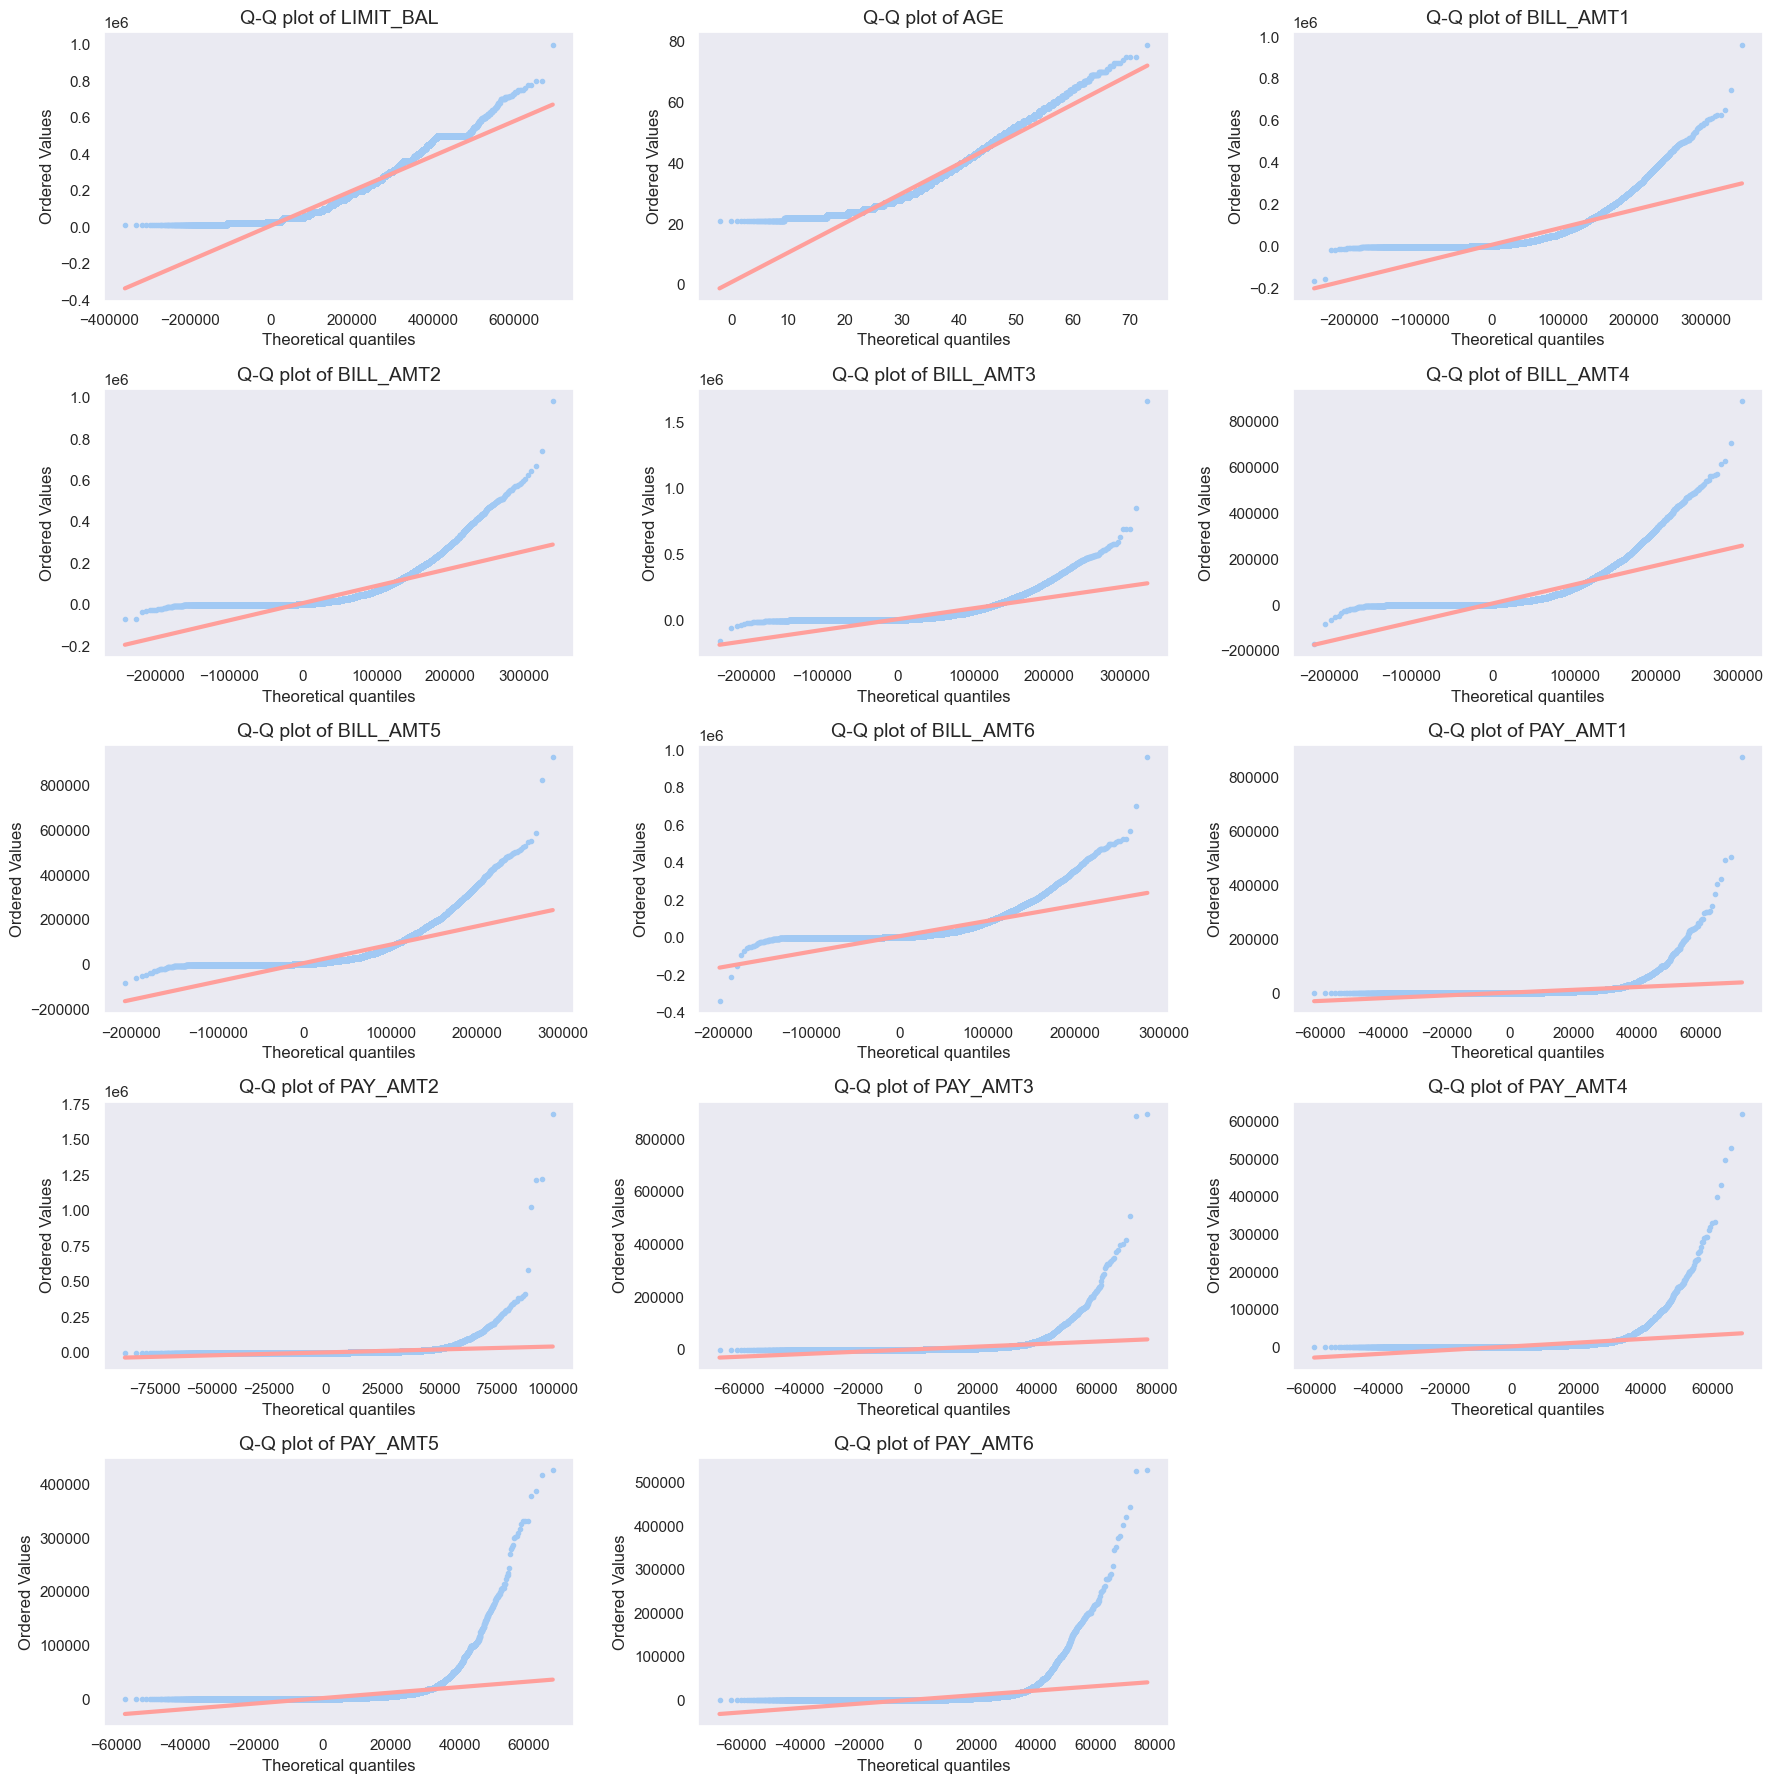

In [208]:
import scipy.stats as stats
# Check gaussian distribution
sns.set_color_codes('pastel')
fig, axs = plt.subplots(5, 3, figsize=(18,18))

numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
i, j = 0, 0
for f in numeric:
    if j == 3:
        j = 0
        i = i+1
    stats.probplot(df[f], 
                   dist='norm', 
                   sparams=(df[f].mean(), df[f].std()), 
                   plot=axs[i,j])
    axs[i,j].set_title(f'Q-Q plot of {f}', fontsize=14)
    axs[i,j].get_lines()[0].set_marker('.')
    
    axs[i,j].grid()
    axs[i,j].get_lines()[1].set_linewidth(3.0)
    j = j+1

fig.tight_layout()
axs[4,2].set_visible(False)
# plt.savefig('images/QQplot.png')
plt.show()


In [209]:
# we have already checked the skewness of numeric columns in the previous cells. to avoid skewness,
# we can apply standard scaling or min-max scaling.

**Learning Point**

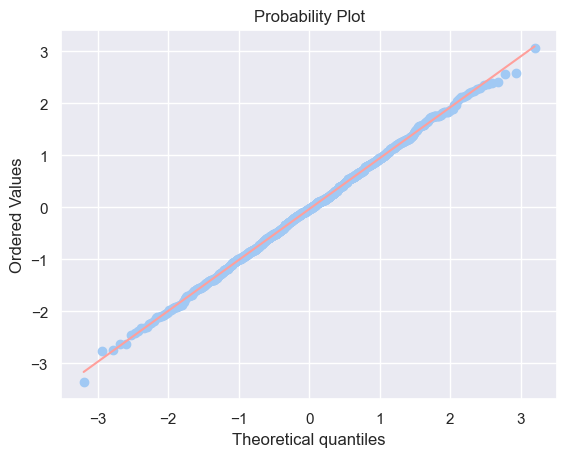

In [210]:
# how ideally QQ plot should look like for normal distribution
import scipy.stats as stats
import matplotlib.pyplot as plt
data = np.random.normal(0, 1, 1000)
stats.probplot(data, dist="norm", plot=plt)
plt.show()


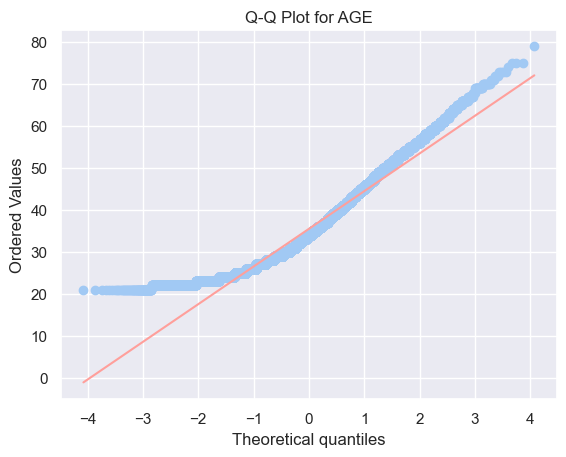

In [211]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example for AGE
stats.probplot(df['AGE'], dist="norm", plot=plt)
plt.title('Q-Q Plot for AGE')
plt.show()

In [212]:
# Save the cleaned dataframe to a new CSV file
cleaned_filename = pathlib.Path(os.path.dirname(os.getcwd())) / pathlib.Path('data/processed/credit_card_cleaned.csv')
df.to_csv(cleaned_filename, index=False)

## **3. Data Preprocessing,  Feature Engineering & Feature Selection**

#### **3.0 Dataset Creation**


To ensure robust model performance and fair evaluation, I created six distinct datasets by systematically varying preprocessing steps. The process includes:

- **Scaling**: All datasets are standardized using `StandardScaler` to normalize feature ranges.
- **Balancing**: SMOTE is applied to selected datasets to address class imbalance.
- **Dimensionality Reduction**: PCA is used in some datasets to reduce feature space while retaining variance.
- **Feature Engineering**: Custom features are derived from raw data to enhance model learning.


- `step1`: `FE` (Feature Engineered) or `Raw`
- `step2`: `Scaled and Normalized (Categorical features)`
- `step3`: `Balanced`, `Unbalanced`, `PCA`, or combinations

| Dataset | Description | `X_train` Name | `y_test` Name |
|--------|-------------|----------------|---------------|
| 1 | Scaled + Unbalanced (no PCA) | `X_train_Raw_Scaled_Unbalanced` | `y_test_Raw_Scaled_Unbalanced` |
| 2 | Scaled + Unbalanced + PCA | `X_train_Raw_Scaled_Unbalanced_PCA` | `y_test_Raw_Scaled_Unbalanced_PCA` |
| 3 | Scaled + Balanced (no PCA) | `X_train_Raw_Scaled_Balanced` | `y_test_Raw_Scaled_Balanced` |
| 4 | Scaled + Balanced + PCA | `X_train_Raw_Scaled_Balanced_PCA` | `y_test_Raw_Scaled_Balanced_PCA` |
| 5 | Feature Engineered + Scaled + Balanced | `X_train_FE_Scaled_Balanced` | `y_test_FE_Scaled_Balanced` |
| 6 | Feature Engineered + Scaled + Unbalanced | `X_train_FE_Scaled_Unbalanced` | `y_test_FE_Scaled_Unbalanced` |

Each dataset is split into `X_train` and `y_test` using stratified sampling to preserve class distribution. This setup allows for comparative analysis of how preprocessing impacts model accuracy, generalization, and fairness.


In [47]:
df = pd.read_csv(r'..\data\processed\credit_card_cleaned.csv')
df.head(2)

LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0    20000.0  Female  University  Married   24      2      2      0      0   
1   120000.0  Female  University   Single   26      0      2      0      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      0      0     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   

   DEFAULT AGE_GROUP  
0        1     21-30  
1        1     21-30

#### **3.1 Dataset with only encoding and scaling**

##### **Dataset 1: Scaled + Unbalanced (Baseline Dataset)**

In [ ]:
# SCALED AND NORMALIZATION #
# one hot encoding for categorical columns


# ONE HOT ENCODING FOR CATEGORICAL FEATURES #
age_dummies = pd.get_dummies(df['AGE_GROUP'], prefix='AGE', dtype=int)
df_one_hot = pd.concat([df, age_dummies], axis=1)
df_one_hot.drop(columns=['AGE_GROUP', 'AGE'], inplace=True)
df_one_hot = pd.get_dummies(df_one_hot, columns=['SEX', 'EDUCATION', 'MARRIAGE'], dtype=int)
df_encoded = df_one_hot.copy()

In [ ]:
# TRAINING AND TESTING DATA SPLIT
X = df_encoded.drop(columns=['DEFAULT'])
y = df_encoded['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
encoded_cols = [col for col in X.columns if col not in numeric_cols]


In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)

X_train_scaled_unbalanced = pd.concat([X_train[encoded_cols], X_train_scaled_df], axis=1)
X_test_scaled_unbalanced = pd.concat([X_test[encoded_cols], X_test_scaled_df], axis=1)
print("Train and Test shapes after scaling:")
print(X_train_scaled_unbalanced.shape, X_test_scaled_unbalanced.shape)


Train and Test shapes after scaling:
(24000, 34) (6000, 34)


##### **Dataset 2: Scaled + Unbalanced + PCA**

In [57]:
pca = PCA(n_components=10)
X_train_scaled_unbalanced_pca = pca.fit_transform(X_train_scaled_unbalanced)
X_test_scaled_unbalanced_pca = pca.transform(X_test_scaled_unbalanced)

print(f"Scaled + Unbalanced + PCA")
print(X_train_scaled_unbalanced_pca.shape, X_test_scaled_unbalanced_pca.shape)

Scaled + Unbalanced + PCA
(24000, 10) (6000, 10)


##### **Dataset 3: Scaled + Balanced**

In [60]:
smote = SMOTE(random_state=42)
X_train_scaled_balanced, y_train_scaled_balanced = smote.fit_resample(X_train_scaled_unbalanced, y_train)
X_test_scaled_balanced = X_test_scaled_unbalanced.copy()
print(f"Scaled + Balanced")
print(X_train_scaled_balanced.shape, X_test_scaled_balanced.shape, y_train_scaled_balanced.shape)


Scaled + Balanced
(37354, 34) (6000, 34) (37354,)


##### **Dataset 4: Scaled + Balanced + PCA**

In [62]:
pca = PCA(n_components=10)
X_train_scaled_balanced_pca = pca.fit_transform(X_train_scaled_balanced)
X_test_scaled_balanced_pca = pca.transform(X_test_scaled_balanced)
y_train_scaled_balanced_pca = y_train_scaled_balanced.copy()
print(f"Scaled + Unbalanced + PCA")
print(X_train_scaled_balanced_pca.shape, X_test_scaled_balanced_pca.shape, y_train_scaled_balanced_pca.shape)

Scaled + Unbalanced + PCA
(37354, 10) (6000, 10) (37354,)


#### **3.2 Dataset with feature engineering**

In [63]:
df = pd.read_csv(r'..\data\processed\credit_card_cleaned.csv')
# df.rename(columns=str.lower, inplace=True)
#  PAY_X is a timing indicator, not a completeness indicator
df['delay_score'] = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum(axis=1)
df['min_pay_ratio_sep'] = df['PAY_AMT1'] / df['BILL_AMT1']
df['total_delay'] = df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].clip(lower=0).sum(axis=1)
df['payment_std'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].std(axis=1)

df[df['min_pay_ratio_sep'] > 1][['PAY_AMT1', 'BILL_AMT1', 'min_pay_ratio_sep']]

PAY_AMT1  BILL_AMT1  min_pay_ratio_sep
11      21818.0    12261.0           1.779463
23      19428.0     5512.0           3.524673
24       5757.0     4744.0           1.213533
28       3415.0      650.0           5.253846
30      17270.0    16646.0           1.037486
...         ...        ...                ...
29970   52951.0    33654.0           1.573394
29983    2890.0     1822.0           1.586169
29984     923.0      315.0           2.930159
29989    9054.0     3425.0           2.643504
29996    1837.0     1683.0           1.091503

[3740 rows x 3 columns]

##### **Dataset 5: Feature Engineered + Scaled + Unbalanced**

##### **Dataset 6: Feature Engineered + Scaled + Balanced**

#### **3.3 Random Model checking**

In [65]:
#train a logistic regression model for SCALED + BALANCED
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled_balanced, y_train_scaled_balanced)

y_pred = logistic_model.predict(X_test_scaled_balanced)
y_pred_prob = logistic_model.predict_proba(X_test_scaled_balanced)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7938
F1 Score: 0.5207
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4687
           1       0.53      0.51      0.52      1313

    accuracy                           0.79      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000



Best parameters: {'logistic__C': 1, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear'}
Best cross-validation F1 score: 0.6485
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4687
           1       0.50      0.56      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



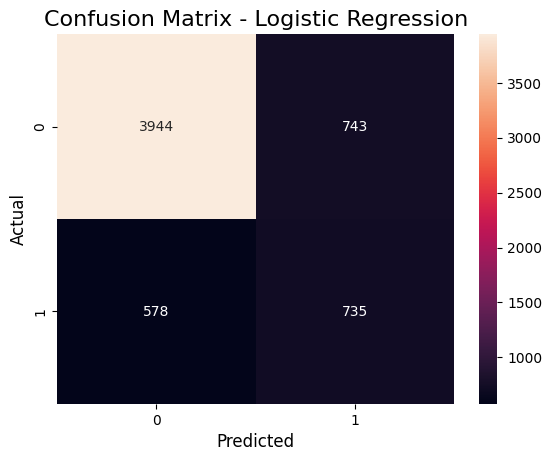

In [68]:
#train a logistic regression model for SCALED + BALANCED with hypertuning
pipe = Pipeline([
    # ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=10)),  
    ('logistic', LogisticRegression(random_state=42, max_iter=1000, C=0.01))
])

param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10],
    'logistic__penalty': ['l1', 'l2'],  
    'logistic__solver': ['liblinear']  # 'liblinear' supports both 'l1' and 'l2' penalties
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled_balanced, y_train_scaled_balanced)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")
print(classification_report(y_test, grid_search.predict(X_test_scaled_balanced)))

sns.heatmap(confusion_matrix(y_test, grid_search.predict(X_test_scaled_balanced)), annot=True, fmt='d')
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

**🔴OUTPERFORMED**

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4687
           1       0.47      0.57      0.51      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.76      0.77      6000

ROC AUC Score: 0.7704


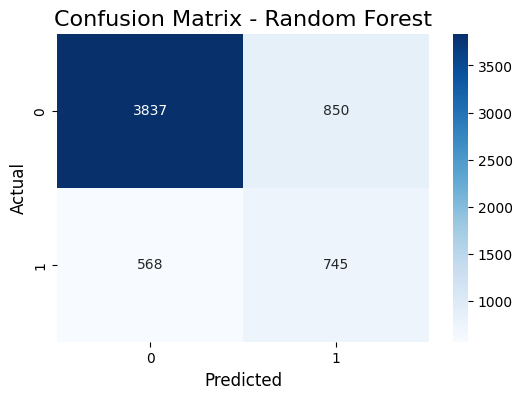

In [71]:
# EXCEPTIONAL PERFORMANCE ON DEFAULT - RECALL 98%
rf = RandomForestClassifier(
    # class_weight={0: 1, 1: 5},
    class_weight= 'balanced',
    n_estimators=200,        # More trees
    max_depth=10,            # Prevent overfitting
    min_samples_split=10,    # Require more samples to split
    min_samples_leaf=5,      # Require more samples in leaves
    random_state=42
)

rf.fit(X_train_scaled_balanced, y_train_scaled_balanced)
y_pred = rf.predict(X_test_scaled_balanced)
print(classification_report(y_test, y_pred))
y_pred_prob = rf.predict_proba(X_test_scaled_balanced)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [72]:
svm = SVC(C=10, gamma=0.01, kernel='rbf')

svm.fit(X_train_scaled_balanced, y_train_scaled_balanced)

y_pred = svm.predict(X_test_scaled_balanced)
# y_pred_prob = svm.predict_proba(X_test_final)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7877
F1 Score: 0.5189
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4687
           1       0.51      0.52      0.52      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000



In [73]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rand_grid = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions={
        "C": [0.1, 1, 10, 100],
        "gamma": [0.001, 0.01, 0.1],
        "kernal": ["rbf", "linear"],
    },
    cv=cv,
    n_iter=5000,
    scoring="accuracy",
    random_state=42,
)

rand_grid.fit(X_train_scaled_balanced, y_train_scaled_balanced)
print(rand_grid.best_params_)

c:\Users\SathkunarajahM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=5000. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'gamma': 0.01, 'C': 10}


## **4. Model Selection & Training**

#### **4.1 Logictic Regression**

In [ ]:
#train a logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)
y_pred_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8158
F1 Score: 0.4336
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.66      0.32      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [ ]:
#train a logistic regression model
logistic_model_10000 = LogisticRegression(random_state=42,max_iter=10000)
logistic_model_10000.fit(X_train_scaled, y_train)

y_pred = logistic_model_10000.predict(X_test_scaled)
y_pred_prob = logistic_model_10000.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8158
F1 Score: 0.4336
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.66      0.32      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [ ]:
# Get feature coefficients
feature_names = X.columns
coefficients = logistic_model_10000.coef_[0]

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print(feature_importance.head(10))

             feature  coefficient  abs_coefficient
1              pay_1     0.680951         0.680951
14          pay_amt2    -0.221133         0.221133
0          limit_bal    -0.192369         0.192369
13          pay_amt1    -0.148090         0.148090
9          bill_amt3     0.146047         0.146047
7          bill_amt1    -0.139117         0.139117
8          bill_amt2     0.132134         0.132134
29  education_Others    -0.125593         0.125593
6              pay_6     0.112155         0.112155
3              pay_3     0.093614         0.093614


In [ ]:
# seems like payment status columns are the most important features for predicting default payment. 
# even pay_1 is the most important feature.


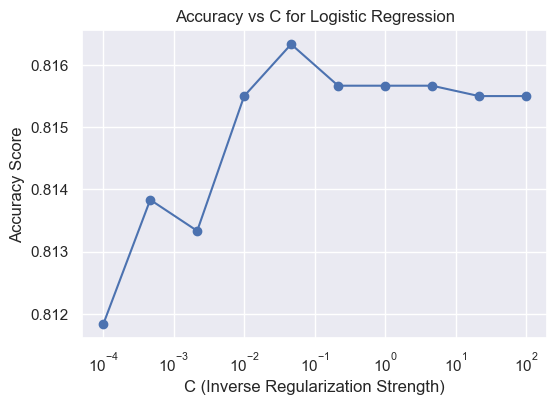

In [ ]:
C_values = np.logspace(-4, 2, 10)
accuracies = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=42, solver='liblinear')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(6, 4))
plt.semilogx(C_values, accuracies, marker='o')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs C for Logistic Regression')
plt.grid(True)
plt.show()

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=10)),  
    ('logistic', LogisticRegression(random_state=42, max_iter=1000, C=0.01))
])

param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10],
    'logistic__penalty': ['l1', 'l2'],  
    'logistic__solver': ['liblinear']  # 'liblinear' supports both 'l1' and 'l2' penalties
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")
print(classification_report(y_test, grid_search.predict(X_test)))

Best parameters: {'logistic__C': 0.001, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear'}
Best cross-validation F1 score: 0.3791
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4687
           1       0.62      0.26      0.36      1313

    accuracy                           0.80      6000
   macro avg       0.72      0.61      0.62      6000
weighted avg       0.78      0.80      0.77      6000



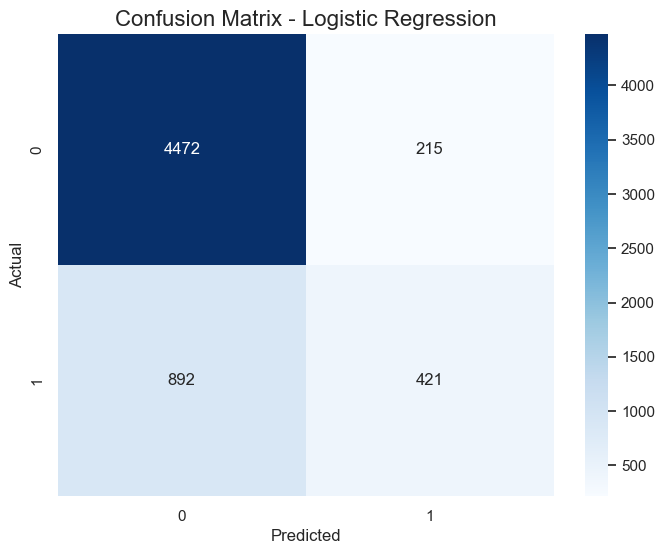

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, grid_search.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [ ]:
# it is very clear that logistic regression is not performing well on this dataset. reason is target variable is imbalanced.
# we need to use SMOTE or any other options to balance the target variable.


#### **4.2 Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
y_pred_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.64      0.33      0.44      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.64      0.33      0.44      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



In [ ]:
rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,        # More trees
    max_depth=10,            # Prevent overfitting
    min_samples_split=10,    # Require more samples to split
    min_samples_leaf=5,      # Require more samples in leaves
    random_state=42
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4687
           1       0.50      0.58      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.69      6000
weighted avg       0.79      0.78      0.79      6000

ROC AUC Score: 0.7784


              precision    recall  f1-score   support

           0       0.89      0.75      0.81      4687
           1       0.42      0.66      0.52      1313

    accuracy                           0.73      6000
   macro avg       0.66      0.70      0.66      6000
weighted avg       0.79      0.73      0.75      6000

ROC AUC Score: 0.7784


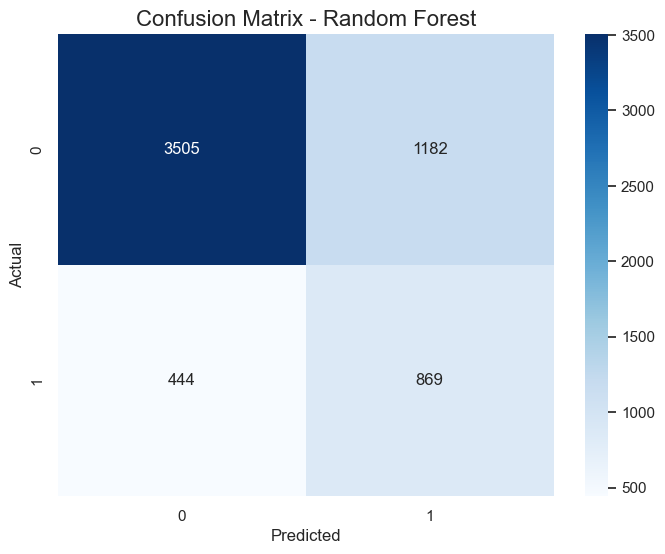

In [ ]:
rf = RandomForestClassifier(
    class_weight={0: 1, 1: 5},
    n_estimators=200,        # More trees
    max_depth=10,            # Prevent overfitting
    min_samples_split=10,    # Require more samples to split
    min_samples_leaf=5,      # Require more samples in leaves
    random_state=42
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()


Best parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best cross-validation F1 score: 0.5239
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4687
           1       0.46      0.57      0.51      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.76      0.77      6000



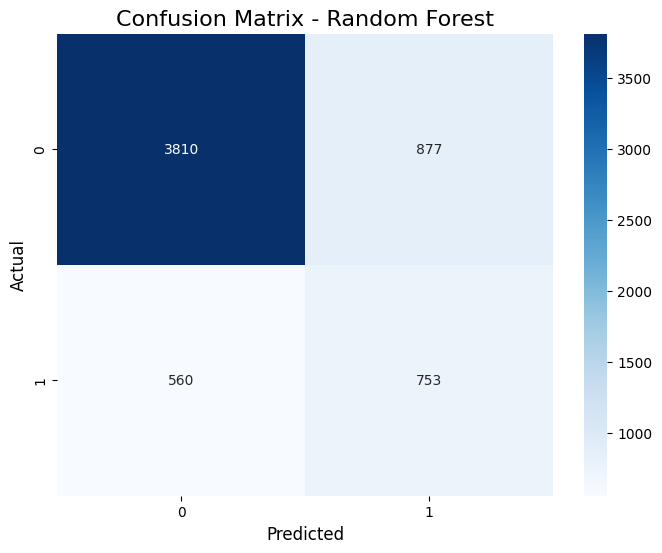

In [ ]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 5]
}

grid_search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation F1 score: {grid_search_rf.best_score_:.4f}")
print(classification_report(y_test, grid_search_rf.predict(X_test)))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, grid_search_rf.predict(X_test)), annot=True
            , fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()


#### **4.3 SVM**

In [ ]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#### **4.5 KNN**

In [88]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled_balanced_pca, y_train_scaled_balanced_pca)

y_pred = knn.predict(X_test_scaled_balanced_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      4687
           1       0.36      0.60      0.45      1313

    accuracy                           0.68      6000
   macro avg       0.61      0.65      0.61      6000
weighted avg       0.75      0.68      0.70      6000



In [90]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled_balanced_pca, y_train_scaled_balanced_pca)
y_pred = grid_search.predict(X_test_scaled_balanced_pca)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best score: 0.7910800154170422
0.6771666666666667
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      4687
           1       0.34      0.50      0.40      1313

    accuracy                           0.68      6000
   macro avg       0.59      0.61      0.59      6000
weighted avg       0.73      0.68      0.70      6000



#### **4.5 Decition Tree**

In [79]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_scaled_balanced, y_train_scaled_balanced)
y_pred = dt.predict(X_test_scaled_balanced)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4687
           1       0.38      0.66      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.72      6000



#### **4.6 XGBoost (eXtreme Gradient Boosting) - Optional**

In [81]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Basic XGBoost Classifier
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss' 
)

# For imbalanced data - better approach
xgb_model = XGBClassifier(
    scale_pos_weight=10,    
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='auc'       
)

# Fit and predict
xgb_model.fit(X_train_scaled_balanced, y_train_scaled_balanced)
y_pred_xgb = xgb_model.predict(X_test_scaled_balanced)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled_balanced)[:, 1]

In [82]:
print(classification_report(y_test, y_pred_xgb))
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"XGBoost ROC AUC Score: {roc_auc_xgb:.4f}")


              precision    recall  f1-score   support

           0       0.92      0.39      0.55      4687
           1       0.29      0.88      0.43      1313

    accuracy                           0.50      6000
   macro avg       0.60      0.63      0.49      6000
weighted avg       0.78      0.50      0.52      6000

XGBoost ROC AUC Score: 0.7508


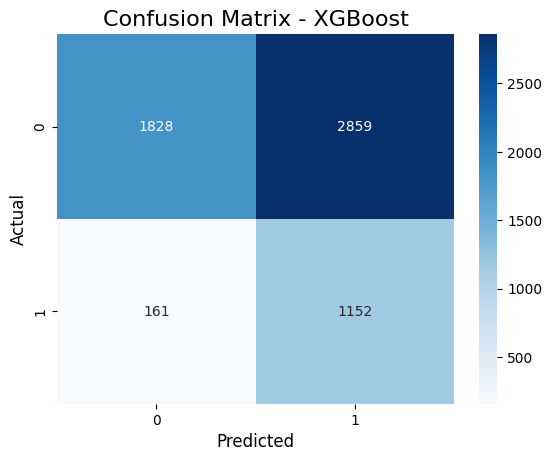

In [83]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

#### **4.7 LightGBM (Light Gradient Boosting) - Optional**

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4687
           1       0.44      0.61      0.51      1313

    accuracy                           0.75      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.75      0.76      6000

XGBoost ROC AUC Score: 0.7639


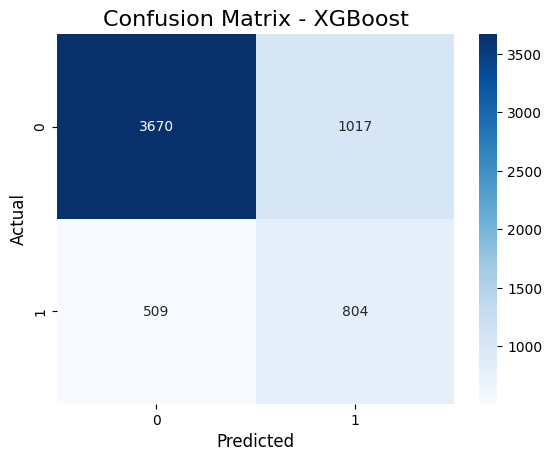

In [86]:
from lightgbm import LGBMClassifier

# Basic LightGBM Classifier
lgb_model = LGBMClassifier(
    random_state=42,
    verbose=-1  
)

# For imbalanced data
lgb_model = LGBMClassifier(
    class_weight='balanced',  # Auto balance classes
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbose=-1
)

# Fit and predict
lgb_model.fit(X_train_scaled_balanced_pca, y_train_scaled_balanced_pca)
y_pred_lgb = lgb_model.predict(X_test_scaled_balanced_pca)
y_pred_proba_lgb = lgb_model.predict_proba(X_test_scaled_balanced_pca)[:, 1]

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_lgb))

print(f"XGBoost ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lgb):.4f}")


sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

## **5. Model Evaluation & Validation**

In [ ]:
# Let's plot scores agains models and hyper parameters

#### Model Selection
 - cross validation
 - hyper parameter tuning

#### Model Evaluation
    metrics
        - accuracy
        - recall
        - precision
        - f1 score
        - confusion matrix
        - ROC Curve


## **6 Conclusion**

In this project, we aimed to predict the likelihood of default on the next payment by credit card holders using a sample dataset. After performing initial data cleansing, we conducted exploratory data analysis (EDA) to uncover patterns, detect anomalies, assess correlations with the target variable, and identify multicollinearity among features.

We then applied a comprehensive preprocessing pipeline that included feature selection, feature extraction, scaling, and normalization. Multiple supervised classification algorithms were trained on various dataset versions created during preprocessing. To address class imbalance, we employed techniques such as SMOTE to improve minority class representation.

Despite these efforts, the models did not yield highly satisfactory results. While algorithms like SVM and ensemble methods showed moderate performance, the recall for the minority class remained low. This could be attributed to the limited size of the dataset and the inherent volatility of financial behavior. To enhance predictive accuracy, future work should consider incorporating additional features—such as behavioral, transactional, or macroeconomic indicators—and possibly expanding the dataset to better capture the complexity of credit default patterns.
